#FFT Leakage: Misaligned vs Bin-Aligned Tones
---
This notebook shows how the Fast Fourier Transform (FFT) represents a sinusoidal signal when its frequency is not perfectly aligned 
with an FFT bin.
    
**Equations:**
    
$$
x(t) = e^{j(2\pi f_0 t + \phi)}
$$


**Sampled Version:**

$$
x[n]= e^{j(2\pi f_0/f_s n + \phi)}
$$

**Sampling Times:**
$$
t[n]=​fn​/fs, n=0,1,…,N−1
$$

**Number of Samples:**
$$
N=Tfs   
$$

**FFT Frequency Resolution:**

$$
Δf=fs​​/N=1/T​
$$

**Nearest FFT Bin:**
    
$$
k∗=round(f0/Δf)
$$
    


N=300, Δf=40.0 Hz, k*=36, bin_center=1440.0 Hz


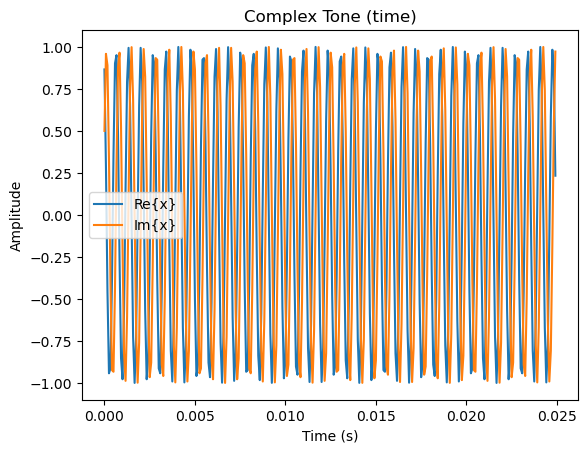

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#parameters
fs = 12_000 #sampling rate (HZ)
T = 0.025  #duration (s)
f0 = 1450  #the signal's frequency tone
phi = np.deg2rad(30) #initial phase (rad)
t = np.arange(0, T, 1/fs)
x = np.exp(1j*( 2*np.pi*f0*t + phi))

N = len(t) #Number of Samples
df = fs/N  #Frequency Resolution (Δf)
k_star= int(np.round(f0/df))
print(f"N={N}, Δf={df:.1f} Hz, k*={k_star}, bin_center={k_star*df:.1f} Hz")
plt.figure()
plt.plot(t, x.real, label='Re{x}')
plt.plot(t, x.imag, label='Im{x}')
plt.xlabel('Time (s)'); plt.ylabel('Amplitude'); plt.title('Complex Tone (time)')
plt.legend(); plt.show()
#Note: If two radar echoes differ by less than 40 Hz,resolving them separately is not possible. They’ll blur into one spike.


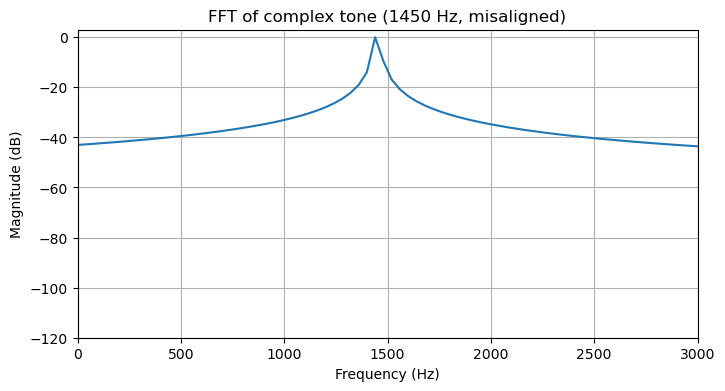

In [18]:
# FFT
#This code shows how a finite-time FFT represents a tone that is not exactly aligned with any FFT bin.
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=1/fs)

# Normalize so the largest magnitude = 0 dB
Xn = X / np.max(np.abs(X))
mag_db = 20 * np.log10(np.abs(Xn) + 1e-12)
plt.figure(figsize=(8,4))
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(mag_db))
plt.xlim(0, 3000)          # focus on positive frequencies
plt.ylim(-120, 3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('FFT of complex tone (1450 Hz, misaligned)')
plt.grid(True)
plt.show()

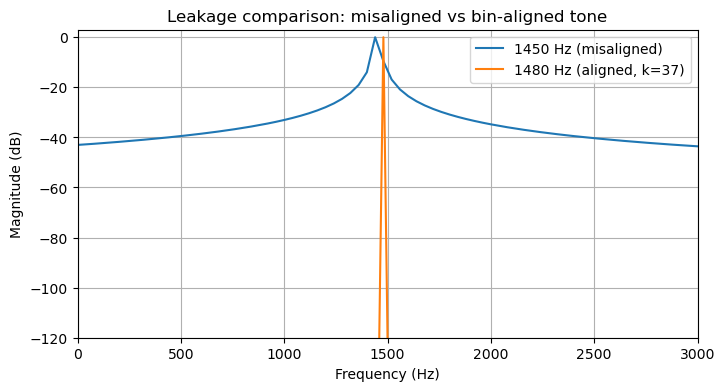

In [19]:
#This code is shows FFT Response of Bin-Aligned vs Misaligned Sinusoidal Tones
f1 = 1480  # exact bin (37 * 40 Hz)
x1 = np.exp(1j*(2*np.pi*f1*t + phi))
X1 = np.fft.fft(x1)
X1n = X1 / np.max(np.abs(X1))
mag1_db = 20 * np.log10(np.abs(X1n) + 1e-12)

plt.figure(figsize=(8,4))
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(mag_db),  label='1450 Hz (misaligned)')
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(mag1_db), label='1480 Hz (aligned, k=37)')
plt.xlim(0, 3000)
plt.ylim(-120, 3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Leakage comparison: misaligned vs bin-aligned tone')
plt.legend()
plt.grid(True)
plt.show()